# Columns Variables

-Survived: 0 = No, 1 = Yes

-Pclass: Ticket class; 1 = 1st, 2 = 2nd, 3 = 3rd

-Sex: male, female

-Age: Age in years

-Sibsp: # of siblings / spouses aboard the Titanic

-Parch: # of parents / children aboard the Titanic

-Ticket: Ticket number

-Fare: Passenger fare

-Cabin: Cabin number

-Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
# import relevant libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from plotly.offline import iplot, plot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("C:/Users/USER/OneDrive/Documents/Projects/Codsoft_pro/Titanic-Dataset.csv") # fetch and read data

In [3]:
df.head(10) # first 10 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Data Cleaning

In [4]:
df.shape # rows and colums

(891, 12)

In [5]:
df.isna().sum() # sum of null values per column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

I'll drop Cabin column  since it contains inadequate data

In [6]:
# remove cabin column
df.drop(columns=['Cabin'], inplace=True, axis=1)

In [7]:
# impute for missing values
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

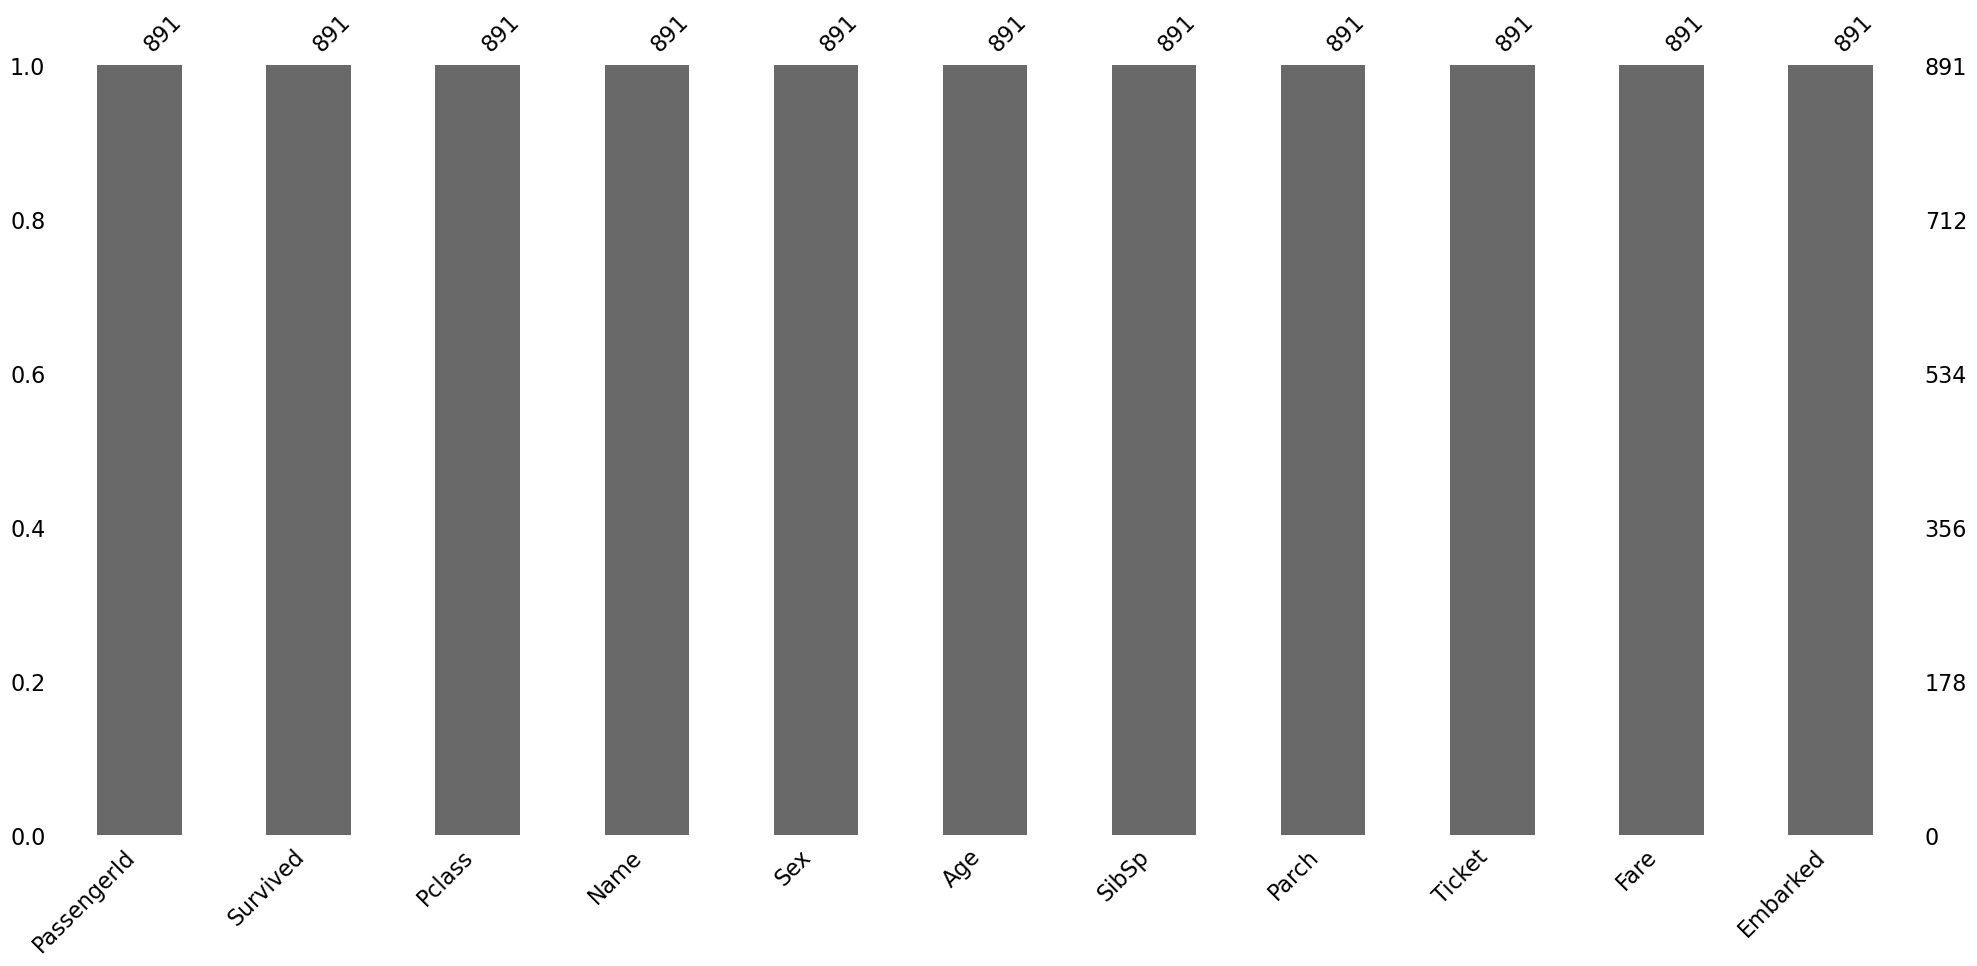

In [8]:
# visualizing for missing values
import missingno as msno
msno.bar(df)
plt.show()

In [9]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
# lets drop some unrelevant columns
df.drop(columns=["Fare", "Ticket"], inplace=True, axis=1)

# Exploratory Data Analysis(EDA)

In [11]:
df.describe() #descriptive analysis(numerical columns)

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


In [12]:
df.describe(include='object')# descriptive analysis(categorical columns)

,Name,Sex,Embarked
count,891,891,891
unique,891,2,3
top,"Braund, Mr. Owen Harris",male,S
freq,1,577,646


 Survived

In [13]:
survived=df["Survived"].value_counts().reset_index() 
survived

,index,Survived
0,0,549
1,1,342


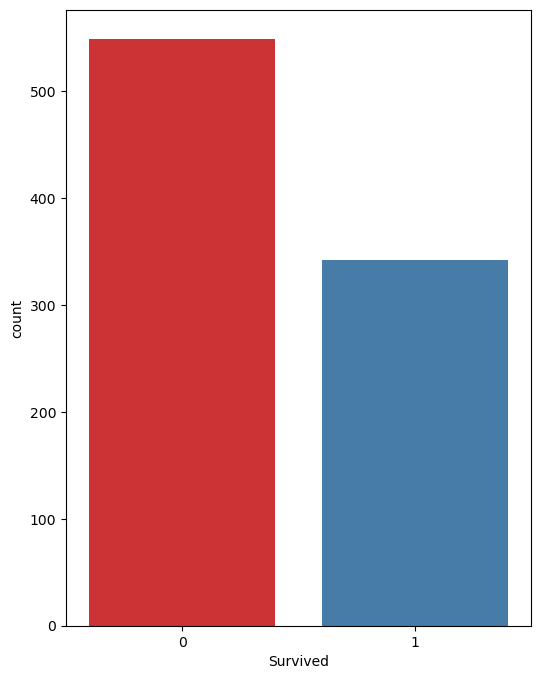

In [14]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="Survived", data=df, palette="Set1")
plt.show()

 Sex

In [15]:
sex = df['Sex'].value_counts().reset_index()
sex

,index,Sex
0,male,577
1,female,314


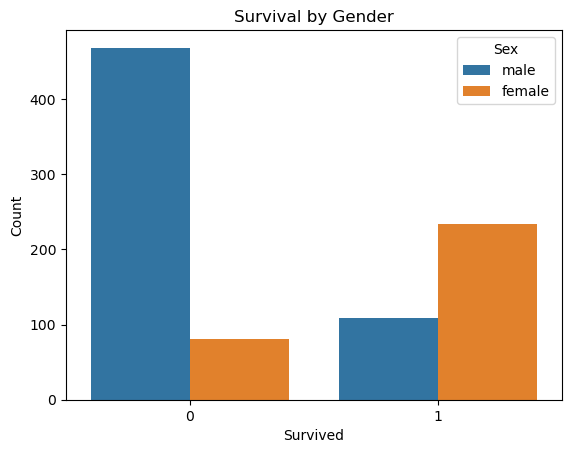

In [16]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

Pclass

In [17]:
pclass = df['Pclass'].value_counts().reset_index() #count entries of each variable in Pclass column
pclass

,index,Pclass
0,3,491
1,1,216
2,2,184


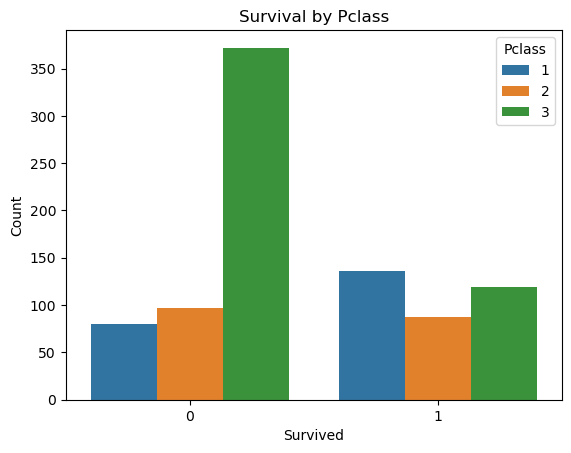

In [18]:
sns.countplot(x='Survived', hue='Pclass', data=df) 
plt.title('Survival by Pclass')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

Sibsp

In [19]:
sibsp=df['SibSp'].value_counts().reset_index() #count entries of each variable in SibSp column
sibsp

,index,SibSp
0,0,608
1,1,209
2,2,28
3,4,18
4,3,16
5,8,7
6,5,5


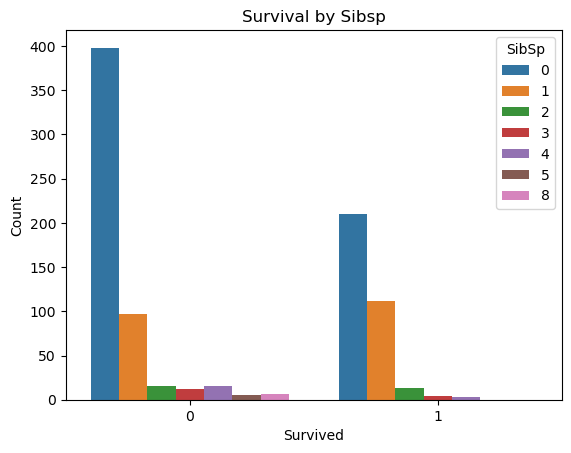

In [20]:
sns.countplot(x='Survived', hue='SibSp', data=df)
plt.title('Survival by Sibsp')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

Parch

In [21]:
parch=df["Parch"].value_counts().reset_index()
parch

,index,Parch
0,0,678
1,1,118
2,2,80
3,5,5
4,3,5
5,4,4
6,6,1


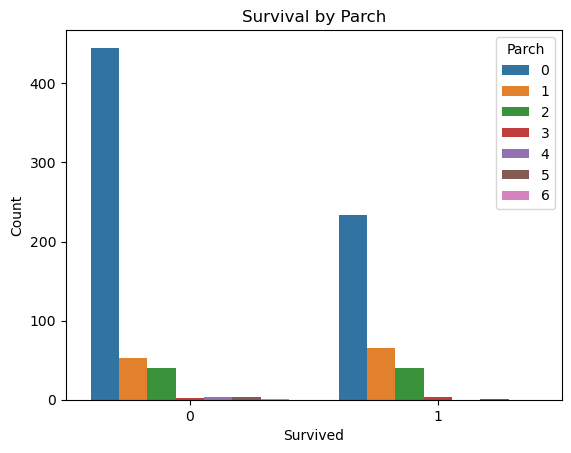

In [22]:
sns.countplot(x='Survived', hue='Parch', data=df)
plt.title('Survival by Parch')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_4976\385715170.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



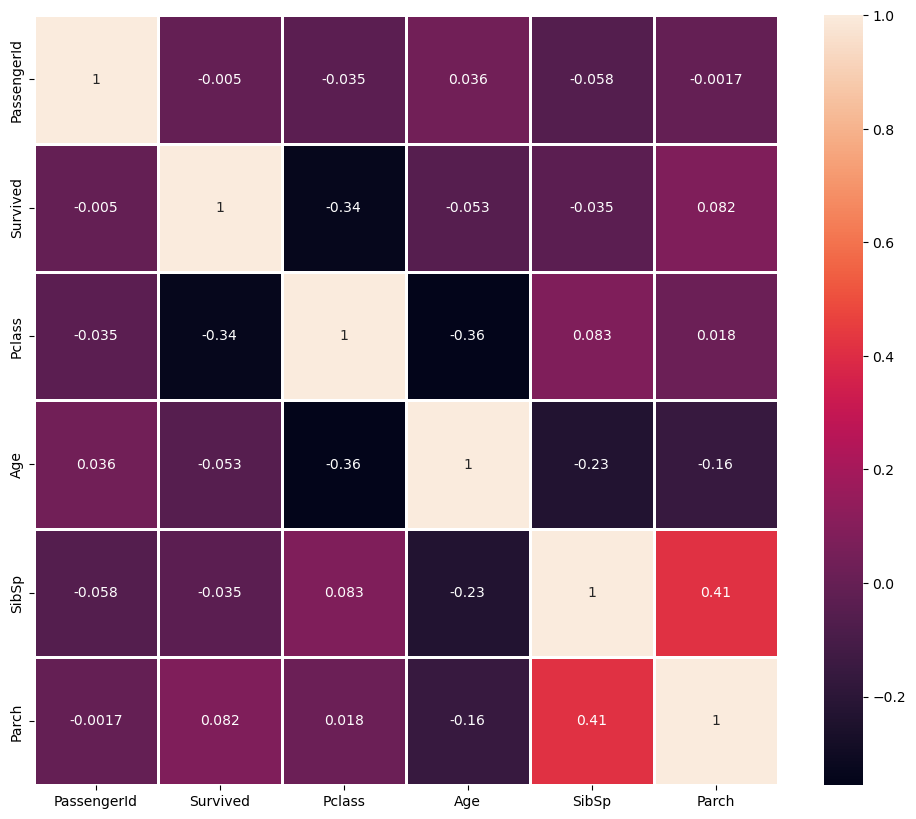

In [23]:
# check for  correlation using heatmap

plt.figure(figsize = (12, 10))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [24]:
# separate the feature and target columns
X = df.drop('Survived', axis = 1)
y = df['Survived']

# Encoding Categorical Column

In [25]:
# extract categorical columns
cat_df = X.select_dtypes(include = ['object'])

cat_df.head(10) 

,Name,Sex,Embarked
0,"Braund, Mr. Owen Harris",male,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C
2,"Heikkinen, Miss. Laina",female,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,S
4,"Allen, Mr. William Henry",male,S
5,"Moran, Mr. James",male,Q
6,"McCarthy, Mr. Timothy J",male,S
7,"Palsson, Master. Gosta Leonard",male,S
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,S
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,C


In [26]:
# convert categorical data into numerical data
cat_df = pd.get_dummies(cat_df, drop_first = True)
cat_df.head()

,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin","Name_Adams, Mr. John","Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Name_Aks, Mrs. Sam (Leah Rosen)","Name_Albimona, Mr. Nassef Cassem","Name_Alexander, Mr. William",...,"Name_Zimmerman, Mr. Leo","Name_de Messemaeker, Mrs. Guillaume Joseph (Emma)","Name_de Mulder, Mr. Theodore","Name_de Pelsmaeker, Mr. Alfons","Name_del Carlo, Mr. Sebastiano","Name_van Billiard, Mr. Austin Blyler","Name_van Melkebeke, Mr. Philemon",Sex_male,Embarked_Q,Embarked_S
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [27]:
# extract the numerical columns
num_df = X.select_dtypes(include = ['int64'])
num_df.head()

,PassengerId,Pclass,SibSp,Parch
0,1,3,1,0
1,2,1,1,0
2,3,3,0,0
3,4,1,1,0
4,5,3,0,0


In [28]:
# join numerical and categorical columns
X = pd.concat([num_df, cat_df], axis = 1)

C:\Users\USER\AppData\Local\Temp\ipykernel_4976\1508105240.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\USER\AppData\Local\Temp\ipykernel_4976\1508105240.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\USER\AppData\Local\Temp\ipykernel_4976\1508105240.py:9: UserWarning:



`distplot` is a dep

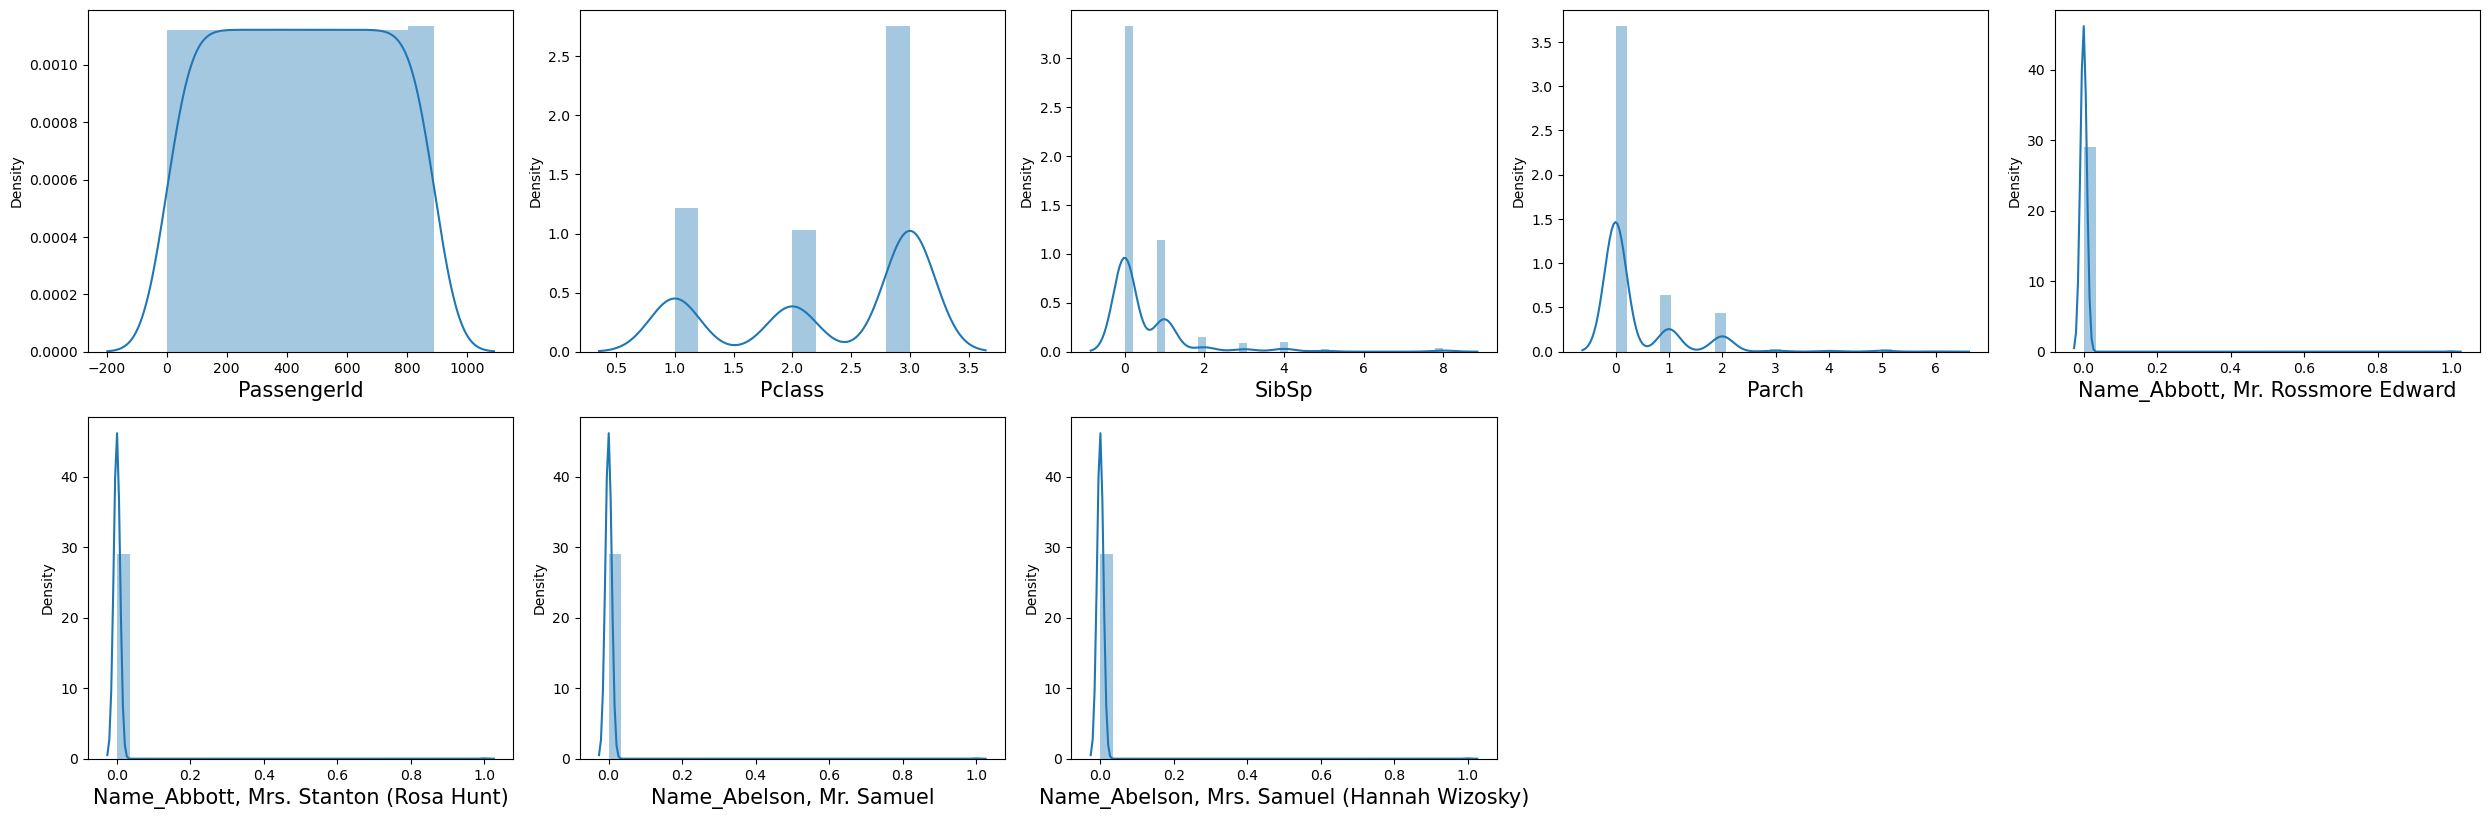

In [29]:
# visualize  the distribution of each column

plt.figure(figsize = (25, 20))
counter = 1

for col in X.columns:
    if counter <= 8:
        ax = plt.subplot(5, 5, counter)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)

    counter += 1

plt.tight_layout()
plt.show()

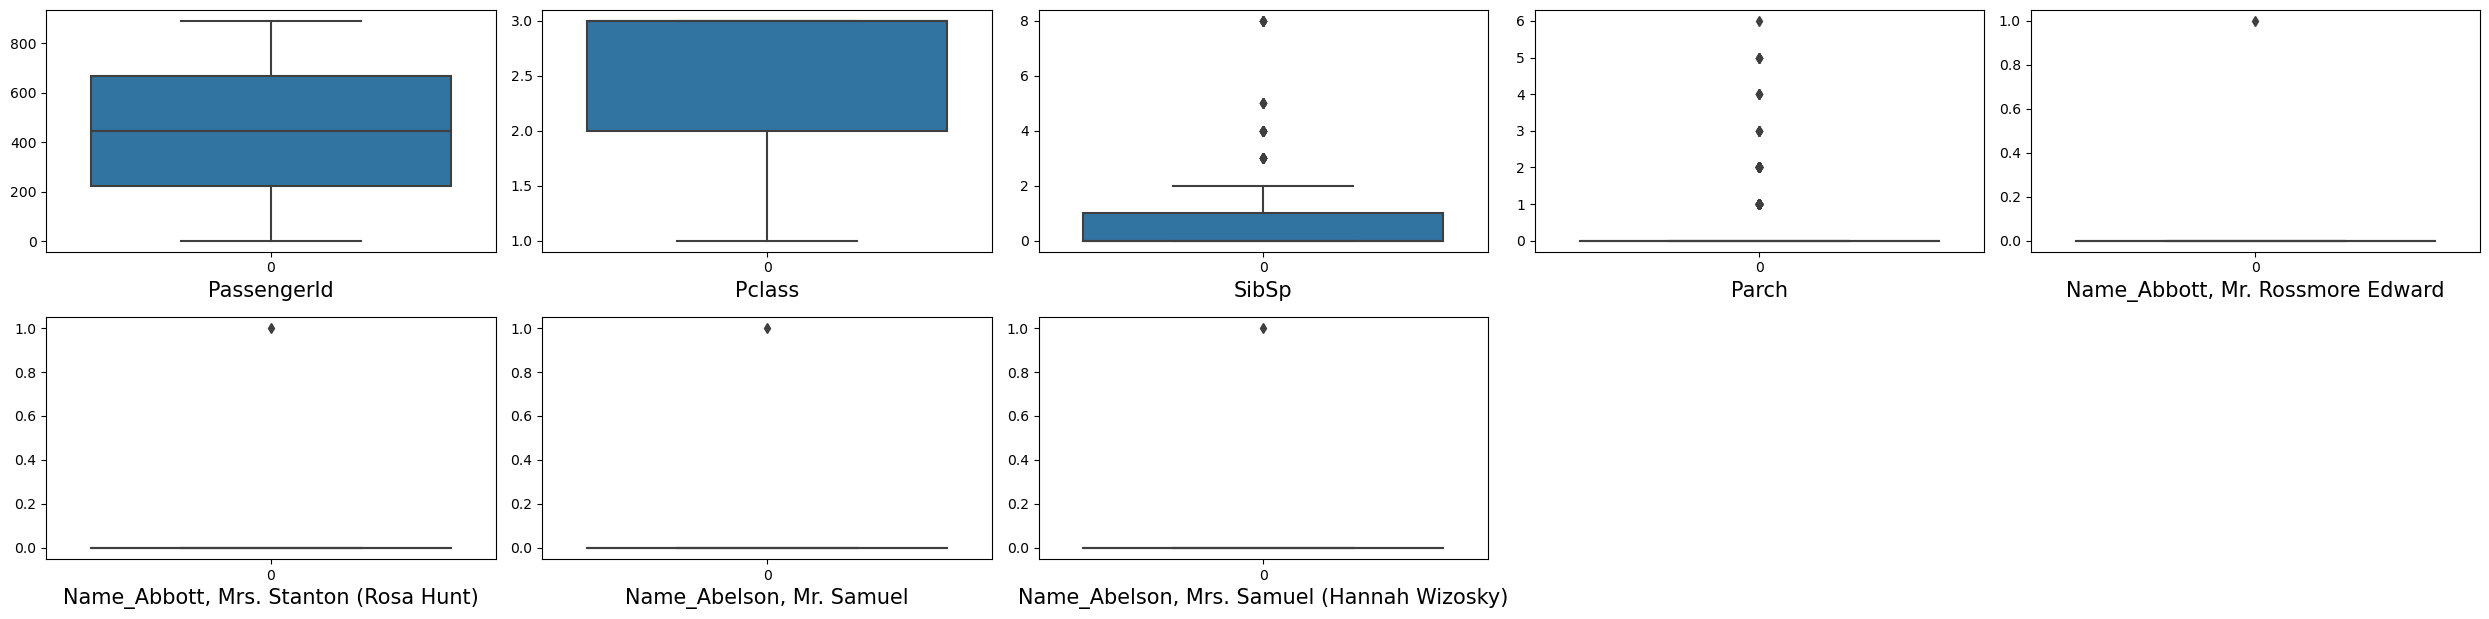

In [30]:
# visualize  for outliers
    
plt.figure(figsize = (25, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

# TRAINING AND TESTING OF THE MODELS

In [31]:
# split data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [32]:
# Scale the numeric values in the dataset

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Support Vector Classification

In [33]:
# import svc classifier
from sklearn.svm import SVC

# create a svc classsifier (assigned to the variable svc)
svc = SVC()

# train the model on the train set
svc.fit(X_train, y_train)


SVC()

In [34]:
# feed the model with X train set to make prediction on y train set "unseen data"
y_pred = svc.predict(X_train)

# evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
svc_train_acc = accuracy_score(y_train, y_pred)
svc_train_acc

1.0

In [35]:
# feed the model with X test set to make prediction on y test set "unseen data"
y_pred_test = svc.predict(X_test)

# evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
svc_test_acc = accuracy_score(y_test, y_pred_test)
svc_test_acc

0.7533632286995515

In [36]:
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[131   6]
 [ 49  37]]
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       137
           1       0.86      0.43      0.57        86

    accuracy                           0.75       223
   macro avg       0.79      0.69      0.70       223
weighted avg       0.78      0.75      0.73       223



# K-Nearest Neighbors clasifier¶

In [37]:
# import KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# create a KNeighbors classifier
knn = KNeighborsClassifier(n_neighbors = 30)

# train the model on the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [38]:
# feed the model with X train 
y_pred = knn.predict(X_train)

# evaluate
knn_train_acc = accuracy_score(y_train, y_pred)
knn_train_acc

0.8233532934131736

In [39]:
# feed the model with X test set to make prediction on y test set "unseen data"
y_pred_test = knn.predict(X_test)

# evaluate
knn_test_acc = accuracy_score(y_test, y_pred_test)
knn_test_acc

0.7488789237668162

In [40]:
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[115  22]
 [ 34  52]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       137
           1       0.70      0.60      0.65        86

    accuracy                           0.75       223
   macro avg       0.74      0.72      0.73       223
weighted avg       0.75      0.75      0.74       223



# AdaBoost Classifier

In [41]:
# import adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

# create adaboost classifier 
ada = AdaBoostClassifier(n_estimators=50, random_state=42)

# train the model on the training set
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [42]:
# Make predictions on the training set
y_pred = ada.predict(X_train)

# Evaluate
ada_acc = accuracy_score(y_train, y_pred)
ada_acc

0.8592814371257484

In [43]:
# Make predictions on the testing set
y_pred_test = ada.predict(X_test)

# Evaluate
ada_acc_test = accuracy_score(y_test, y_pred_test)
ada_acc_test

0.7623318385650224

In [44]:
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[119  18]
 [ 35  51]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       137
           1       0.74      0.59      0.66        86

    accuracy                           0.76       223
   macro avg       0.76      0.73      0.74       223
weighted avg       0.76      0.76      0.76       223



# Decision tree

In [45]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# create a decision tree classifier
dtc = DecisionTreeClassifier()

# train the model on train  set
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
# make prediction on  the train set
y_pred = dtc.predict(X_train)

# evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
dtc_train_acc = accuracy_score(y_train, y_pred)
dtc_train_acc

1.0

In [47]:
# make prediction on  the test set
y_pred_test = dtc.predict(X_test)

# evaluate 
dtc_test_acc = accuracy_score(y_test, y_pred_test)
dtc_test_acc

0.7802690582959642

In [48]:
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[117  20]
 [ 29  57]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       137
           1       0.74      0.66      0.70        86

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223



# Evaluation and comparision of all the models

In [49]:
models = pd.DataFrame({
    'Model': ['Support Vector', 'K_Neighbors', 'Decison Tree', 'Ada boost',],
    'Accuracy Score': [svc_test_acc *100,knn_test_acc *100,dtc_test_acc *100,ada_acc_test*100,]})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
2,Decison Tree,78.026906
3,Ada boost,76.233184
0,Support Vector,75.336323
1,K_Neighbors,74.887892
